In [1]:
s = range(3)
print([*s])
print((*s,))
print({*s})

#Available only in 3.5+

[0, 1, 2]
(0, 1, 2)
{0, 1, 2}


#### For looping over partially consumed iterator

In [2]:
l = [1,2,3,4,5]
it = iter(l)
next(it)

1

In [3]:
for i in it:
    print(i)

2
3
4
5


In [4]:
a = 1
b = 'a'
c = (2,)
d = [1]

print(a.__hash__())
print(b.__hash__())
print(c.__hash__())
print(d.__hash__())

1
8577990961394010104
6909455589863252355


TypeError: 'NoneType' object is not callable

In [5]:
s = input('Enter any list, tuple, or string\n')  #s is always a string
it = s.__iter__()
while 1:
    try:
        i = next(it)
        print(i)
    except StopIteration:
        print('End of world')
        break


Enter any list, tuple, or string
fsdfs
f
s
d
f
s
End of world


In [6]:
it = [2,3,3,3,3].__iter__()

while 1:
    try:
        i = next(it)
        print(i)
    except StopIteration:
        print('End of world')
        break

2
3
3
3
3
End of world


#### Python List Comarisons Tricks
identity matters

`a is b`

order matters, duplicates matter

`a == b`

order ignored, duplicates matter

`Counter(a) = Counter(b)`

both order and duplicates ignored

`set(a) = set(b)`

In [1]:
l = [1,2,3,4]
print(*l, sep = '-', end = ' !')

1-2-3-4 !

In [2]:
print(l)

[1, 2, 3, 4]


In [3]:
print(1, 2, 3, sep='--',end='|')

1--2--3|

#### bitwise `>>` (right shift )and `<<` (left shift) operator

 - `x >> n` 'consumes' `n` rightmost bits. This is the same as //'ing x by 2**n. So `100101 >> 1` will give `10010`. 
 
 - `x << n` Returns x with the bits shifted to the left by n places (and new bits on the right-hand-side are zeros). This is the same as multiplying x by 2\**n. So, `100101 << 2` will give `010100`
 
 verify above with examples?

#### bit flip operator

In [4]:
-1 == ~0

True

Recall that ``~`` is the bit-flip operator, and evidently when you flip all the bits of zero you end up with -1. If you're curious as to why this is, look up the two's complement integer encoding scheme, which is what Python uses to encode signed integers, and think about what happens when you start flipping all the bits of integers encoded this way.

In [9]:
bool(3.33), bool(""), bool("abc"), bool(0), bool([]), bool([3])

(True, False, True, False, False, True)

In [10]:
x = 0.125
x.as_integer_ratio() #denominator will always be positive


(1, 8)

In [11]:
x.is_integer(), x.hex() #float.hex return string representation of hexadecimal value of float

(False, '0x1.0000000000000p-3')

In [12]:
x = 1+2j
x.conjugate(), x.imag

((1-2j), 2.0)

#### Python Quirks

In [2]:
id(type) - id(object)

-416

In [16]:
[] = ()
[] = {}
() = ()
() = []
{} = []


SyntaxError: can't assign to literal (<ipython-input-16-72102c16109a>, line 5)

In [17]:
{} = {}

SyntaxError: can't assign to literal (<ipython-input-17-ba2384680aab>, line 1)

In [18]:
print(id({}) == id({}))

print({} is {})


True
False


### Random Points

In [19]:
>>> from string import *
>>> print(ascii_uppercase)


ABCDEFGHIJKLMNOPQRSTUVWXYZ


#### Some Helpful Tips and Tricks

Check if two words are anagram - 

In [38]:
from collections import Counter
def ana(s1,s2):
    return Counter(s1) == Counter(s2)

ana('ram','mar')

True

In [39]:
ana('ab','bc')

False

Use `ord` function to find out the Unicode code point of any character - 

In [41]:
symbols = 'axt'
[ord(s) for s in symbols]

[97, 120, 116]

#### Accessing module's doc

In [43]:
import sys
print(sys.__doc__) #this is better than plain `sys.__doc__`

This module provides access to some objects used or maintained by the
interpreter and to functions that interact strongly with the interpreter.

Dynamic objects:

argv -- command line arguments; argv[0] is the script pathname if known
path -- module search path; path[0] is the script directory, else ''
modules -- dictionary of loaded modules

displayhook -- called to show results in an interactive session
excepthook -- called to handle any uncaught exception other than SystemExit
  To customize printing in an interactive session or to install a custom
  top-level exception handler, assign other functions to replace these.

stdin -- standard input file object; used by input()
stdout -- standard output file object; used by print()
stderr -- standard error object; used for error messages
  By assigning other file objects (or objects that behave like files)
  to these, it is possible to redirect all of the interpreter's I/O.

last_type -- type of last uncaught exception
last_value -- value

In [44]:
>>> m = 1_000_000_000
>>> m

#Only in Python3.6+


1000000000

In Python, even simple data objects, like integers, can invoke methods. Also '-' is a unary operator. 

In second example below, it is applied to the sum of 99 and 28, because attribute access binds more tightly than '-'.

In [47]:
(-99).__add__(28)


-71

In [48]:
-99 .__add__(28)

-127

In [51]:
def knn(k,x, sortlist):
    i = bisect(sortlist, x)
    segment = sortlist[max(i-k,0): i+k]
    return nsmallest(k,segment, key = lambda y: abs(x-y))

from bisect import *
l = [1,2,3,4,5,6,7,8,9]

knn(2,4,l)

#source - https://twitter.com/raymondh/status/981198588834299904

NameError: name 'nsmallest' is not defined

In [52]:
from collections import Counter
from random import random
c = Counter(round(sum(random() for i in range(150))) for j in range(600)) 

for i in range(min(c), max(c)+1):
    print('*'*c[i])
    
#source - https://twitter.com/raymondh/status/972549441201750016

**
*
******
************
****************
*******************
*******************************************
**********************************
***********************************************************
**********************************************************************
*****************************************************************
*************************************************************
****************************************************
******************************************
*********************************************
*****************************
***********************
******
*********
****

**


In [53]:
e = .000001
c = complex(-0.75, e)
i = z = 0
while abs(z) < 1.0:
    z = z**2 + c
    i += 1
print(i*e)    

#source - https://twitter.com/raymondh/status/974134329017184256

3.14159


#### Reading the source code of the module you imported 

In [54]:
import os
import inspect
import pprint

pprint.pprint(inspect.getsource(os))

('r"""OS routines for NT or Posix depending on what system we\'re on.\n'
 '\n'
 'This exports:\n'
 '  - all functions from posix or nt, e.g. unlink, stat, etc.\n'
 '  - os.path is either posixpath or ntpath\n'
 "  - os.name is either 'posix' or 'nt'\n"
 "  - os.curdir is a string representing the current directory (always '.')\n"
 "  - os.pardir is a string representing the parent directory (always '..')\n"
 "  - os.sep is the (or a most common) pathname separator ('/' or '\\\\')\n"
 "  - os.extsep is the extension separator (always '.')\n"
 "  - os.altsep is the alternate pathname separator (None or '/')\n"
 '  - os.pathsep is the component separator used in $PATH etc\n'
 "  - os.linesep is the line separator in text files ('\\r' or '\\n' or "
 "'\\r\\n')\n"
 '  - os.defpath is the default search path for executables\n'
 "  - os.devnull is the file path of the null device ('/dev/null', etc.)\n"
 '\n'
 "Programs that import and use 'os' stand a better chance of being\n"
 'portable betw

 '    def __init__(self, stream, proc):\n'
 '        self._stream = stream\n'
 '        self._proc = proc\n'
 '    def close(self):\n'
 '        self._stream.close()\n'
 '        returncode = self._proc.wait()\n'
 '        if returncode == 0:\n'
 '            return None\n'
 "        if name == 'nt':\n"
 '            return returncode\n'
 '        else:\n'
 '            return returncode << 8  # Shift left to match old behavior\n'
 '    def __enter__(self):\n'
 '        return self\n'
 '    def __exit__(self, *args):\n'
 '        self.close()\n'
 '    def __getattr__(self, name):\n'
 '        return getattr(self._stream, name)\n'
 '    def __iter__(self):\n'
 '        return iter(self._stream)\n'
 '\n'
 '# Supply os.fdopen()\n'
 'def fdopen(fd, *args, **kwargs):\n'
 '    if not isinstance(fd, int):\n'
 '        raise TypeError("invalid fd type (%s, expected integer)" % '
 'type(fd))\n'
 '    import io\n'
 '    return io.open(fd, *args, **kwargs)\n'
 '\n'
 '\n'
 '# For testing purposes,

#### Python has Infinity and Not a Number values:

#### `del` and `__del__`

`del` doesn't delete a object, it merely decreases the reference counter. `__del__` actually destroys the object.

#### `python -i foo.py`
Run a #python script and enter the interactive mode having access to everything defined in the script python -i foo.py

[Source](https://twitter.com/python_tip/status/1007237101199527936)

#### `itertools.compress`

Use itertools.compress to filter a sequence based on the results of filtering another related sequence:

In [65]:
from itertools import compress

value = [1,2,3,4,5]
name = ['Sam','Peter', 'Mac','James', 'Ryan']

count = [n > 3 for n in value]

list(compress(name, count))

['James', 'Ryan']

In [66]:
#alternative method

import numpy as np 
countsnp=np.array(value) 
namesnp=np.array(name) 
print(namesnp[countsnp>3])

['James' 'Ryan']


In [67]:
# another way
[n for n, c in zip(name, value) if c > 3]

['James', 'Ryan']

In [68]:
class Test():
    a = 1

test = Test()
test.a

1

In [69]:
getattr(test, 'a')

1

In [5]:
array = [1, 8, 15] 
g = (x for x in array if array.count(x) > 0) 
array = [2, 8, 22] 
print(list(g))

[8]


In [2]:
g

<generator object <genexpr> at 0x03397C60>

[doc source for below](https://docs.python.org/3/library/difflib.html#sequencematcher-examples)

In [6]:
from difflib import SequenceMatcher

s1 = "This is my string"
s2 = "This is my new string"
s = SequenceMatcher(None, s1, s2)
print(round(s.ratio(),3))


0.895


In [7]:
s.get_matching_blocks()

[Match(a=0, b=0, size=11),
 Match(a=11, b=15, size=6),
 Match(a=17, b=21, size=0)]

In [8]:
for block in s.get_matching_blocks():
    print("a[%d] and b[%d] match for %d elements" %block)

a[0] and b[0] match for 11 elements
a[11] and b[15] match for 6 elements
a[17] and b[21] match for 0 elements


#### Access environment variables with `os.environ`:

In [6]:
import os
'PATH' in os.environ

True

In [7]:
os.environ.get('PGUSER', None)

'postgres'

#### An interesting Python idiom

In [3]:
def accumulate(x, prev = None):
    prev_elements = prev or []
    prev_elements.append(x)
    return prev_elements

accumulate(2)

[2]

In [4]:
accumulate(3)

[3]

[Source](https://twitter.com/GaelVaroquaux/status/1090142057878994944)

Let's talk about immutability. Python, unlike languages like Clojure, Erlang, and Rust is built entirely around mutable state. I'm going to try to convince you that immutability is awesome and can be effectively used in Python today. Thread ->

1- If an object is immutable it means that its state cannot be changed after it is created. For instance, in Python you can't change a character in a string, or reassign an element of a tuple. Python ships with a few immutable datatypes: str, bytes, tuple/namedtuple, frozenset.

2- Users can of course create their own immutable datatypes / objects. If an object doesn't have API to mutate its state and all of its public attrubutes are exposed via a readonly @property it is effectively immutable.

3- Immutable objects are special because that can be "hashable". That means that they implement a `__hash__()` method, which, in turn, means that they can be keys in dicts and other mappings.

4- It's not safe to make a mutable object hashable. Imagine a dictionary key that isn't stable and can be changed at any time! Thus immutability and hashability are closely related things.

5- That said, it's possible for an immutable collection to be non-hashable. Hashing is a recursive operation, so If an immutable collection contains a mutable object, it becomes non-hashable.

```python
immutable = ([],)
hash(immutable) #error
```
6- Hashable & immutable objects and collections can be used as cache keys. Therefore functions that receive only immutable arguments and have no side effects can be decorated with `@functools.lru_cache` to speed things up! <img src="images/imm1.jpg" width="500" height="500"/>

7- Immutable objects are so easy to reason about; you can cache them & pass them around safely. For example, `inspect.signature()` function returns a Signature object. It has a lot of metadata, all of which is immutable. So it's cached and computed only once per a function!

8a- Another great examples is the new 'contextvars' stdlib module. Context Variables are similar to threadlocal objects, and are used to have local state in async/await code. How can we implement this local state and make it super fast to capture the state?

8b- The answer, of course, is to make it immutable! contextvars store all their state in an immutable collection, so to capture the entire local state you only need to assign it to a variable! Any change to the state creates a new version of the state.

8- We use the same concept in @edgedatabase, where the schema of the database is stored in an immutable collection. It means that implementing support for transactions, savepoints, and DDL is easy.

9- Unfortunately Python doesn't have an immutable mapping datatype yet. There's a trick though: types.MappingProxyType. Wrap a dict with it and return it from your API. Without access to the wrapped dict it's impossible to mutate the MappingProxy:

<img src="images/imm2.jpg" width="500" height="500"/>

10- So `types.MappingProxyType` can be used to expose a read-only dict and that's great. Sadly it's not hashable though, so it can't be used as a cached key etc. There's a solution though. The above mentioned contextvars module required an efficient immutable mapping type.

11- The implementation of that new mapping type is rather complex, and it would be a shame if we could only use it for contextvars and nothing else. So we created a new library out of it: immutables. [MagicStack](https://t.co/IV6fzv4tPf)

12- With `immutables.Map` you can easily create immutable and hashable mappings. The Map type is almost as fast as Python dict, with O(log32 N) lookup/update complexity. Maybe we'll have it in Python 3.8 stdlib!
<img src="images/imm3.jpg" width="500" height="500"/>

13- BTW, there's a new trick to easily declare named tuples in Python: `typing.NamedTuple`. I use it all the time.
<img src="images/imm4.jpg" width="500" height="500"/>

14- Similar to (13), you can also create a frozen dataclass:
<img src="images/imm5.jpg" width="500" height="500"/>

15- Bonus. Did you know about `namedtuple._replace()` method?
<img src="images/imm6.jpg" width="500" height="500"/>

#### Prime Number List

In [1]:
from functools import reduce

# Primes < 1000
print(list(filter(None,map(lambda y:y*reduce(lambda x,y:x*y!=0,
map(lambda x,y=y:y%x,range(2,int(pow(y,0.5)+1))),1),range(2,1000)))))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


In [2]:
# First 10 Fibonacci numbers
print(list(map(lambda x,f=lambda x,f:(f(x-1,f)+f(x-2,f)) if x>1 else 1:
f(x,f), range(10))))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


#### Prime Number Generator - By Martelli, Hettinger and Tim Peters

In [6]:
from itertools import *

def erat2():
    d = {}
    yield 2
    for q in islice(count(3),0,None,2):
        p = d.pop(q,None)
        if p is None:
            d[q*q] = q
            yield q
        else:
            x = p + q
            while x in d or not (x&1):
                x += p
            d[x] = p    
        

def get_prime(n):
    return list(takewhile(lambda p: p<n, erat2()))

# code credit goes to Alex Martelli, Raymond Hettinger, Tim Peters etc
get_prime(5)

[2, 3]

In [7]:
_print = print

def print(*args, **kwargs):
    narg = (*args, '\nhiyaaa')
    _print(*narg, **kwargs)
    
print('mayank') 

mayank 
hiyaaa


In [8]:
print('HI')

HI 
hiyaaa


In [9]:
del _print

In [1]:
print('Hi')


Hi


#### Travelling Salesman Portrait

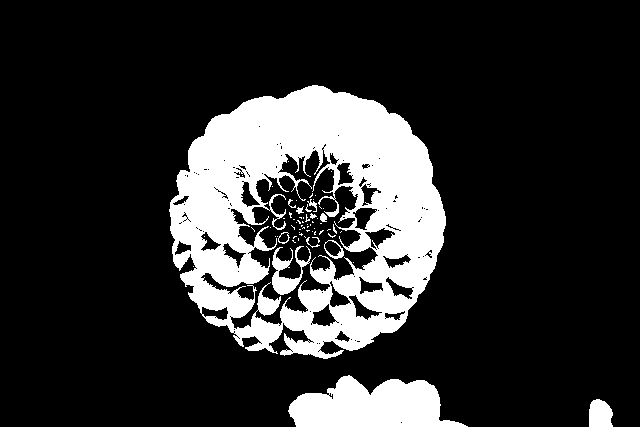

In [4]:
import numpy as np
from PIL import Image

img = Image.open('images/flower.jpg')
bw_image = img.convert('1', dither= Image.NONE)
bw_image

([], [])

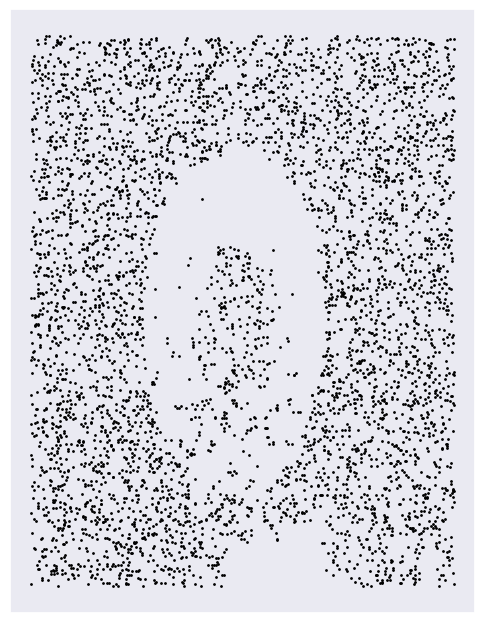

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

bw_array = np.array(bw_image, dtype = np.int64)
black_indices = np.argwhere(bw_array == 0)
chosen_indices = black_indices[np.random.choice(black_indices.shape[0], replace = False, size = 5000)]

plt.figure(figsize = (6,8), dpi =100)
plt.scatter([x[1] for x in chosen_indices],
            [x[0] for x in chosen_indices],
            color = 'black', s=1)
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

In [ ]:
from itertools import combinations
import math

distance_lookup = {}

for (p1, p2) in combinations(range(len(chosen_indices)), r = 2):
    p1 = tuple(chosen_indices[p1])
    p2 = tuple(chosen_indices[p2])
    x1,y1 = p1
    x2,y2 = p2
    distance_lookup[(p1,p2)] = math.sqrt((x2-x1)**2+(y2-y1)**2)
    
distance_matrix = []

for row_num in range(0,len(chosen_indices)):
    row_list = []
    for col_num in range(0, row_num):
        p1 = tuple(chosen_indices[row_num])
        p2 = tuple(chosen_indices[col_num])
        if (p1,p2) in distance_lookup:
            row_list.append(distance_lookup[p1,p2])
        
        else:
            row_list.append(distance_lookup[p2,p1])
            
    distance_matrix.append(row_list)        

#### Generating following series - 
```
[1 1]
[2 1]
[1 2 1 1]
[1 1 1 2 2 1]
[3 1 2 2 1 1]
[1 3 1 1 2 2 2 1]
```

In [2]:
import numpy as np
import itertools

def ser(a):
    t = [(len(list(group)), key) for key, group in itertools.groupby(a)]
    b = np.array(t).flatten()
    return b

a = [1]
n = 0
while n < 10:   
    a = ser(a)
    print(a)
    n += 1


[1 1]
[2 1]
[1 2 1 1]
[1 1 1 2 2 1]
[3 1 2 2 1 1]
[1 3 1 1 2 2 2 1]
[1 1 1 3 2 1 3 2 1 1]
[3 1 1 3 1 2 1 1 1 3 1 2 2 1]
[1 3 2 1 1 3 1 1 1 2 3 1 1 3 1 1 2 2 1 1]
[1 1 1 3 1 2 2 1 1 3 3 1 1 2 1 3 2 1 1 3 2 1 2 2 2 1]


#### Simulating Brownian Motion

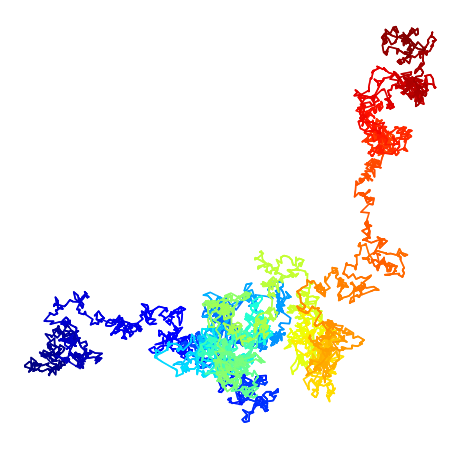

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

n = 5000

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))

k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

In [2]:
s = [1,2,3,4,5]
list(map(str,s))
#output- ['1','2','3','4','5']

['1', '2', '3', '4', '5']

In [4]:
help('+')

Operator precedence
*******************

The following table summarizes the operator precedence in Python, from
highest precedence (most binding) to lowest precedence (least
binding).  Operators in the same box have the same precedence.  Unless
the syntax is explicitly given, operators are binary.  Operators in
the same box group left to right (except for exponentiation, which
groups from right to left).

Note that comparisons, membership tests, and identity tests, all have
the same precedence and have a left-to-right chaining feature as
described in the Comparisons section.

+-------------------------------------------------+---------------------------------------+
| Operator                                        | Description                           |
|=================================================|=======================================|
| "(expressions...)",  "[expressions...]", "{key: | Binding or parenthesized expression,  |
| value...}", "{expressions...}"                 

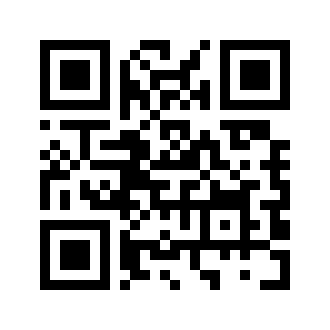

In [1]:
import qrcode

qr = qrcode.QRCode()
qr.add_data('twitter.com/prakharseth19')
qr.make()
qr.make_image(fill_color = 'black', back_color = "white")

[Source of `latexify`](https://colab.research.google.com/drive/1MuiawKpVIZ12MWwyYuzZHmbKThdM5wNJ?usp=sharing)

In [6]:
import math
import latexify

@latexify.with_latex
def solve(a,b,c):
    return (-b + math.sqrt(b**2 - 4*a*c))/(2*a)

solve

In [9]:
@latexify.with_latex
def sinc(x):
    if x == 0:
        return 1
    else:
        return math.sin(x)/x

sinc

In [11]:
@latexify.expression
def solve(a,b,c):
    return (-b + math.sqrt(b**2 - 4*a*c))/(2*a)

solve

In [18]:
@latexify.function
def solve(a,b,c):
    return (-b + math.sqrt(b**2 - 4*a*c))/(2*a)

solve(1,4,3), print(solve)


\mathrm{solve}(a, b, c) = \frac{-b + \sqrt{b^{{2}} - {4} a c}}{{2} a}


(-1.0, None)

In [19]:
solve

In [20]:
len({1, True, 1.0})

1

What is the result of the following:

```Python
len({1, True, 1.0})
```

In [23]:
a = {1, True, 1.0}
a, type(a)

({1}, set)

What does this print? [Source: GvR Tweet](https://twitter.com/gvanrossum/status/1354305179244392453)

In [24]:
x = 0
y = 0

def f():
    x = 1
    y = 1
    class C:
        print(x,y) #what will be printed
        x = 2
        
f()        

0 1


Use following code snippet to request any number of inputs. Note that it will stop taking input as soon as input value matches second argument. 

In [25]:
for el in iter(input,""):
    print(el)

33
33
re
re
fd
fd
ff
ff



Write function for following - 

input = `'aaaabbbcca'`

Output: `[("a", 4), ("b", 3), ("c", 2), ("a", 1)]`

In [121]:
#not working with end characters

inp = 'aabbca'

index = len(inp)
output = [] 
count = 1

for i in range(index-1): #i = 0,1,2,3
    
    if inp[i] == inp[i+1]:
        count+=1
    
    else:
        output.append((inp[i], count))
        count = 1
        
        
output

#i = 0, 

[('a', 2), ('b', 2), ('c', 1)]

In [8]:
inp = 'aabbcaaad'

i = 0
output = [] 
count = 0
init = inp[0]

while i < len(inp):
    if inp[i]== init:
        count+=1
    else:    
        output.append((init, count))
        init = inp[i]
        count = 1
    i+=1
    
    if  i == len(inp):
        output.append((init,count))
        
output        
    

[('a', 2), ('b', 2), ('c', 1), ('a', 3), ('d', 1)]